# GHZ states

3-qubit GHZ state is defined as:

$
\dfrac{|000\rangle + |111\rangle }{\sqrt{2}}
$

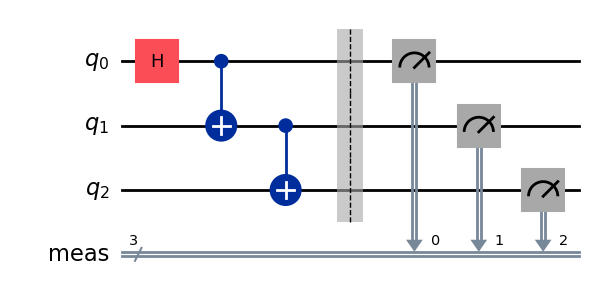

In [1]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)

# Apply Hadamard gate to the first qubit and CNOT gates in sequence to entangle the qubits
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

# Measure the qubits
qc.measure_all()

# Draw the circuit
qc.draw('mpl')

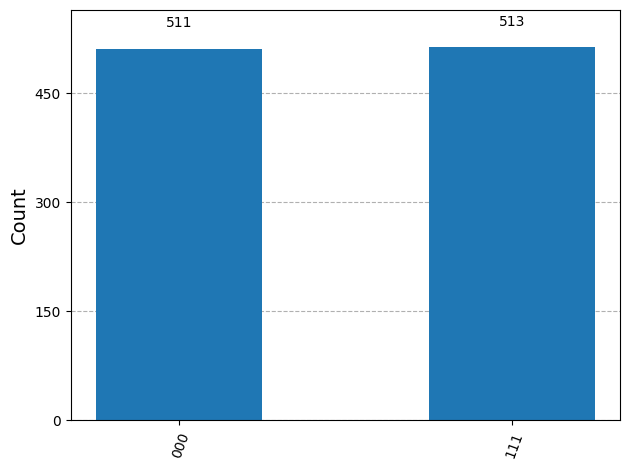

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Use Aer simulator
backend = AerSimulator()

# Transpile and assemble the circuit
compiled = transpile(qc, backend)

# Run the circuit on the simulator
job = backend.run(compiled, shots=1024)

# Get the results
result = job.result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)

## Use `prepare_state` method

We can use the `prepare_state` method to create this state in Qiskit.

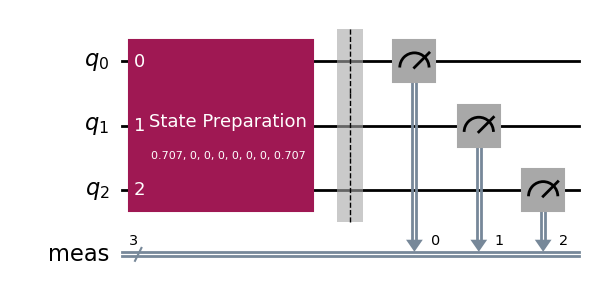

In [3]:
from math import sqrt

ghz_vec = [1/sqrt(2), 0, 0, 0, 0, 0, 0, 1/sqrt(2)] # |000>, ..., |111>

qc = QuantumCircuit(3)
qc.prepare_state(ghz_vec, qc.qubits)
qc.measure_all()

qc.draw('mpl')

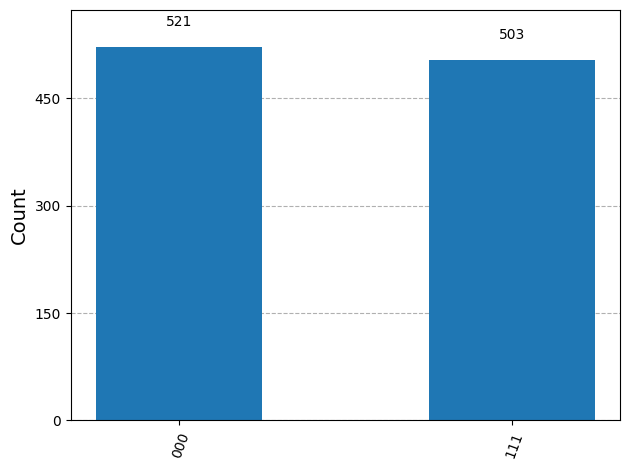

In [4]:
# Use Aer simulator
backend = AerSimulator()

# Transpile and assemble the circuit
compiled = transpile(qc, backend)

# Run the circuit on the simulator
job = backend.run(compiled, shots=1024)

# Get the results
result = job.result()
counts = result.get_counts()

# Plot the results
plot_histogram(counts)